# Help

https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

# Librairies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

# A- Analyse de la stationnarité d'un bruit blanc gaussien

## 1

In [13]:
mu, sigma = 0, 1
x = np.random.normal(mu, sigma,size=1000)

## 2

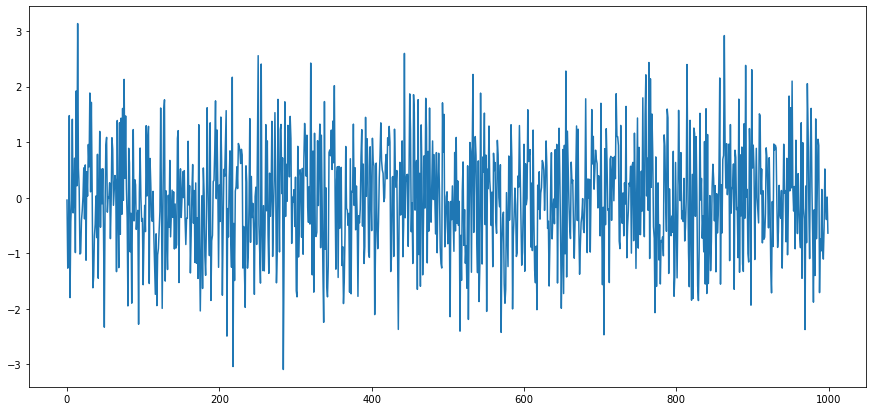

In [12]:
plt.figure(figsize=(15,7))
plt.plot(x)

## 3

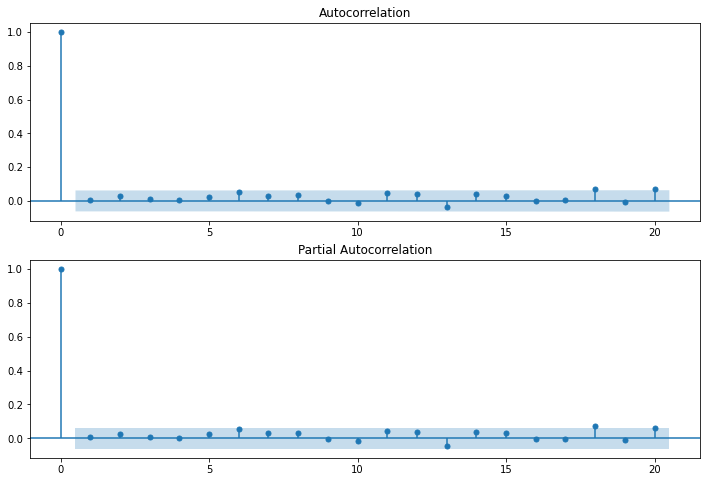

In [15]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(x, lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(x, lags=20, ax=ax2)

L'autocorrélation et l'autocorrélation partielle sont des mesures de l'association entre les valeurs de séries actuelles et passées, elles indiquent les valeurs de séries passées les plus utiles pour prédire les valeurs futures. Avec ces données, on peut déterminer l'ordre des processus dans un modèle ARIMA par exemple.

L'axe des x du tracé ACF indique le décalage auquel l'autocorrélation est calculée, l'axe des ordonnées indique la valeur de la corrélation (entre 0 et 1). Par exemple, un pic à décalage 1 dans un tracé ACF indique une forte corrélation entre chaque valeur de la série et la valeur précédente, un pic à l'offset 2 indique une forte corrélation entre chaque valeur et la valeur apparaissant deux points avant, etc.
Une corrélation positive indique que des valeurs de courant élevées correspondent à des valeurs élevées au écalage spécifié ; une corrélation négative indique que des valeurs de courant élevées correspondent à valeurs basses au décalage spécifié.

La zone bleue sur les deux graphiques correspond à la bande de confiance à 95 % et nous indique si la corrélation est significative ou non. Les pointes des deux fonctions sur nos cas sont très faibles, proches de 0 ce qui signifie qu'il n'y a pas de corrélation et strictement identiques, car nous avons utilisé un processus de bruit blanc.

## 4

In [18]:
from statsmodels.tsa.stattools import adfuller, kpss

In [20]:
result_adf = adfuller(x)
print('ADF Statistic: %f' % result_adf[0])
print('p-value: %f' % result_adf[1])
print('Critical Values:')
for key, value in result_adf[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -31.358135
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


In [29]:
result_kpss = kpss(x)
print('KPSS Statistic: %f' % result_kpss[0])
print('p-value: %f' % result_kpss[1])
print('Critical Values:')
for key, value in result_kpss[3].items():
    print('\t%s: %.3f' % (key, value))

KPSS Statistic: 0.235792
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/Users/pierreloviton/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


Test ADF :
- H0 (p>0.05) : pas stationnaire
- H : peut être stationnaire

Ici on a p-value = 0, nous pouvons alors rejeter H0. Le bruit blanc gaussien est donc probablement stationnaire

Test KPSS :
- H0 (p>0.05) : stationnaire ou a des tendances stationnaires
- H : pas stationnaire

Ici on a p-value = 0.1, nous pouvons alors accepter H0. Le bruit blanc gaussien est donc stationnaire ou, au moins, a des tendances stationnaires.

Suite à ces 2 tests statistiques effectués, nous pouvons conclure que le bruit blanc gaussien est très probablement stationnaire.

# B- Analyse d'une série réelle

## B.1- Analyse de la stationnarité 

### 1

In [70]:
df = pd.read_csv('sales.csv',parse_dates=True,index_col=0)

In [35]:
df.head()

,Food,Fuel,Notfood
2016-01-01,99.43,93.31,99.27
2016-02-01,99.88,93.85,99.90
2016-03-01,101.21,92.83,99.11
2016-04-01,96.78,92.33,100.12
2016-05-01,98.45,99.12,98.09


In [36]:
df.shape

(57, 3)

### 2

In [72]:
food = df['Food']
Food = food[:48]

fuel = df['Fuel']
Fuel = fuel[:48]

In [73]:
# Food test

print("\n The Shapiro-Wilk test : \n", stats.shapiro(Food))
print("\n The Box-Pierce test : \n", acorr_ljungbox(Food, boxpierce=True,lags=1))


 The Shapiro-Wilk test : 
 ShapiroResult(statistic=0.969536542892456, pvalue=0.2430015206336975)

 The Box-Pierce test : 
 (array([0.70810503]), array([0.40007361]), array([0.66561873]), array([0.4145833]))


In [74]:
# Fuel Test

print("\n The Shapiro-Wilk test : \n", stats.shapiro(Fuel))
print("\n The Box-Pierce test : \n", acorr_ljungbox(Fuel, boxpierce=True, lags=[1]))


 The Shapiro-Wilk test : 
 ShapiroResult(statistic=0.9344725608825684, pvalue=0.010003598406910896)

 The Box-Pierce test : 
 (array([40.63106132]), array([1.83860628e-10]), array([38.19319764]), array([6.40754038e-10]))


Le test de Shapiro-Wilk évalue l'hypothèse nulle que les données ont été tirées d'une distribution normale. Nous avons la valeur statistique et la valeur de p en résultat. Pour la partie Fuel par exemple, la p-value = 0.24 et est > 0,05. Sachant que l'hypothèse nulle est que la population est normalement distribuée, si la valeur de p est supérieure au niveau alpha choisi (0,05), alors la valeur nulle hypothèse ne doit pas être rejetée. C'est ainsi que nous pouvons dire que nos données sont normalement distribué.

Pour le test Box-Pierce, cela nous donne 4 tableaux. Le test Box Pierce évalue si oui ou non la série est principalement du bruit blanc. Par conséquent, lorsque nous obtenons H0 (hypothèse nulle), le résultat est du bruit blanc et lorsque nous obtenons H1 (hypothèse alternative), il n'y a pas de bruit blanc. Ainsi, lorsque la p-value est supérieure à 0,05, on ne rejette pas l'hypothèse nulle et la série est un bruit blanc. On voit que les valeurs sont particulièrement petites et sont évidemment inférieures à 0,05. Ainsi, nous rejetons l'hypothèse nulle : il n'y a pas de bruit blanc.

En conclusion pour nos cas, il n'y a pas de bruit blanc dans la série FUEL ce qui confirme qu'elle n'est pas stationnaire, contrairement à la série FOOD. En effet, le bruit blanc est toujours stationnaire au sens large. Nous pouvons alors réutiliser ce que nous avons lors de la première partie.

Text(0.5, 1.0, 'Evolution du CA du pétrole')

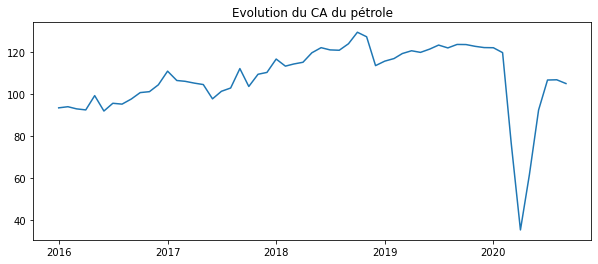

In [48]:
plt.figure(figsize=(10,4))
plt.plot(df['Fuel'])
plt.title('Evolution du CA du pétrole')

Text(0.5, 1.0, 'Evolution du CA des produits alimentaires')

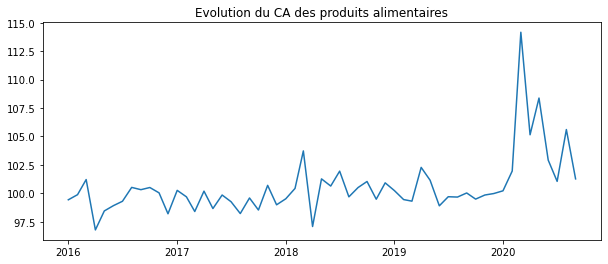

In [45]:
plt.figure(figsize=(10,4))
plt.plot(df['Food'])
plt.title('Evolution du CA des produits alimentaires')

Les graphiques ci-dessus confirment nos déductions sur la stationnarité de ces séries temporelles.
En effet, comme vu en classe, une série temporelle est dite strictement stationnaire si toutes ses observations sont tirés de la même distribution. (moyenne, covariance, variance : rien ne va)

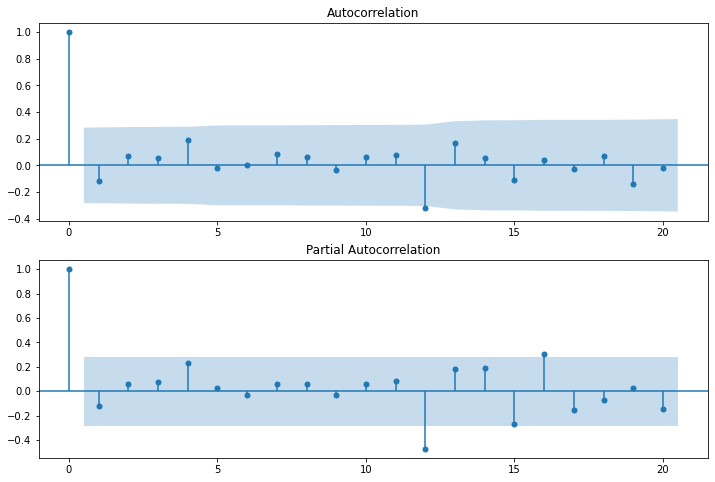

In [76]:
# Food Test
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(Food, lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(Food, lags=20, ax=ax2)

/Users/pierreloviton/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


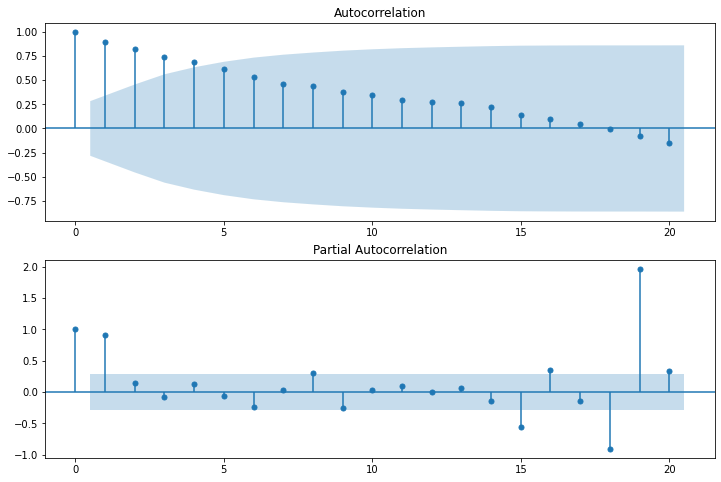

In [75]:
# Fuel Test
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(Fuel, lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(Fuel, lags=20, ax=ax2)

On peut finir par utiliser les test ADF et KPSS:

In [77]:
result_adf_food = adfuller(Food)
print('FOOD:\n\n')
print('ADF Statistic: %f' % result_adf_food[0])
print('p-value: %f' % result_adf_food[1])
print('Critical Values:')
for key, value in result_adf_food[4].items():
    print('\t%s: %.3f' % (key, value))
    
result_kpss_food = kpss(Food)
print('\nKPSS Statistic: %f' % result_kpss_food[0])
print('p-value: %f' % result_kpss_food[1])
print('Critical Values:')
for key, value in result_kpss_food[3].items():
    print('\t%s: %.3f' % (key, value))

FOOD:


ADF Statistic: -7.558842
p-value: 0.000000
Critical Values:
	1%: -3.578
	5%: -2.925
	10%: -2.601

KPSS Statistic: 0.297653
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/Users/pierreloviton/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/Users/pierreloviton/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [78]:
result_adf_fuel = adfuller(Fuel)
print('FUEL:\n\n')
print('ADF Statistic: %f' % result_adf_fuel[0])
print('p-value: %f' % result_adf_fuel[1])
print('Critical Values:')
for key, value in result_adf_fuel[4].items():
    print('\t%s: %.3f' % (key, value))
    
result_kpss_fuel = kpss(Fuel)
print('\nKPSS Statistic: %f' % result_kpss_fuel[0])
print('p-value: %f' % result_kpss_fuel[1])
print('Critical Values:')
for key, value in result_kpss_fuel[3].items():
    print('\t%s: %.3f' % (key, value))

FUEL:


ADF Statistic: -1.583118
p-value: 0.492068
Critical Values:
	1%: -3.578
	5%: -2.925
	10%: -2.601

KPSS Statistic: 0.531034
p-value: 0.034677
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/Users/pierreloviton/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


FOOD=


Test ADF :
- H0 (p>0.05) : pas stationnaire
- H : peut être stationnaire

Ici on a p-value = 0, nous pouvons alors rejeter H0. Cette série est donc probablement stationnaire

Test KPSS :
- H0 (p>0.05) : stationnaire ou a des tendances stationnaires
- H : pas stationnaire

Ici on a p-value = 0.1, nous pouvons alors accepter H0. Cette série est donc stationnaire ou, au moins, a des tendances stationnaires.

Suite à ces 2 tests statistiques effectués, nous pouvons conclure que la série food est très probablement stationnaire.

FUEL=


Test ADF :
- H0 (p>0.05) : pas stationnaire
- H : peut être stationnaire

Ici on a p-value = 0.492068, nous pouvons alors accepter H0. La série fuel n'est pas stationnaire.

Test KPSS :
- H0 (p>0.05) : stationnaire ou a des tendances stationnaires
- H : pas stationnaire

Ici on a p-value = 0.034677, nous pouvons alors rejeter H0. La série fuel n'est pas stationnaire.

Suite à ces 2 tests statistiques effectués, nous pouvons conclure que las série fuel n'est pas stationnaire.

## B.2- Influence de la différenciation de stationnarité

### 1

In [79]:
diffFuel = np.diff(Fuel)

### 2 

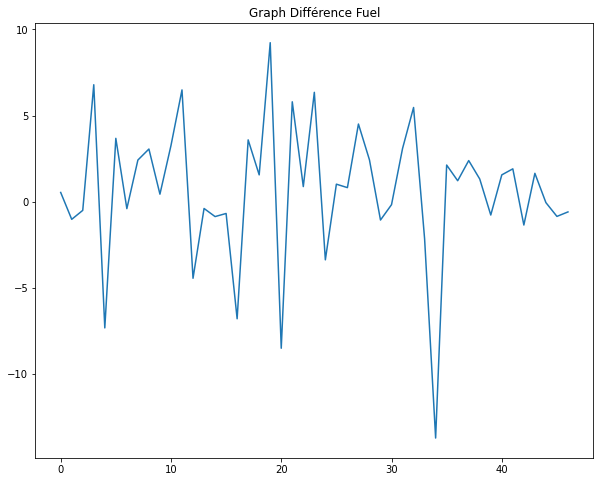

In [83]:
plt.figure(figsize=(10,8))
plt.title("Graph Différence Fuel")
plt.plot(diffFuel)
plt.show()

Visuellement, on peut penser que la nouvelle série obtenue est stationnaire.

### 3

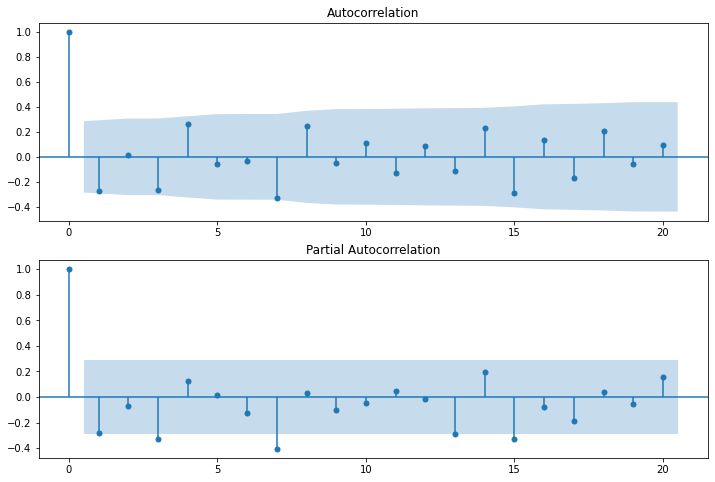

In [84]:
# Fuel Test
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(diffFuel, lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(diffFuel, lags=20, ax=ax2)

Selon les ACF et PACF de la nouvelle série, on ne peut pas dire directement si ces deux séries sont stationnaires ou non, nous devons effectuer les tests avec l'ADF et le KPSS.

### 4

In [85]:
result_adf_fuel = adfuller(diffFuel)
print('DIFF FUEL:\n\n')
print('ADF Statistic: %f' % result_adf_fuel[0])
print('p-value: %f' % result_adf_fuel[1])
print('Critical Values:')
for key, value in result_adf_fuel[4].items():
    print('\t%s: %.3f' % (key, value))
    
result_kpss_fuel = kpss(diffFuel)
print('\nKPSS Statistic: %f' % result_kpss_fuel[0])
print('p-value: %f' % result_kpss_fuel[1])
print('Critical Values:')
for key, value in result_kpss_fuel[3].items():
    print('\t%s: %.3f' % (key, value))

DIFF FUEL:


ADF Statistic: -5.698833
p-value: 0.000001
Critical Values:
	1%: -3.589
	5%: -2.930
	10%: -2.603

KPSS Statistic: 0.154787
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/Users/pierreloviton/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/Users/pierreloviton/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


DIFF FUEL=


Test ADF :
- H0 (p>0.05) : pas stationnaire
- H : peut être stationnaire

Ici on a p-value = 0.000001, nous pouvons alors accepter H0. Cette série est donc probablement stationnaire.

Test KPSS :
- H0 (p>0.05) : stationnaire ou a des tendances stationnaires
- H : pas stationnaire

Ici on a p-value = 0.1, nous pouvons alors accepter H0. Cette série est donc stationnaire ou, au moins, a des tendances stationnaires.

Suite à ces 2 tests statistiques effectués, nous pouvons conclure que la série food est très probablement stationnaire.

# C- Ajustement d'un modèle ARIMA à une série réelle

## 1

In [99]:
xtrain_food = food[:48]
xtest_food = food[48:]

xtrain_fuel = fuel[:48]
xtest_fuel = fuel[48:]

## 2

/Users/pierreloviton/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


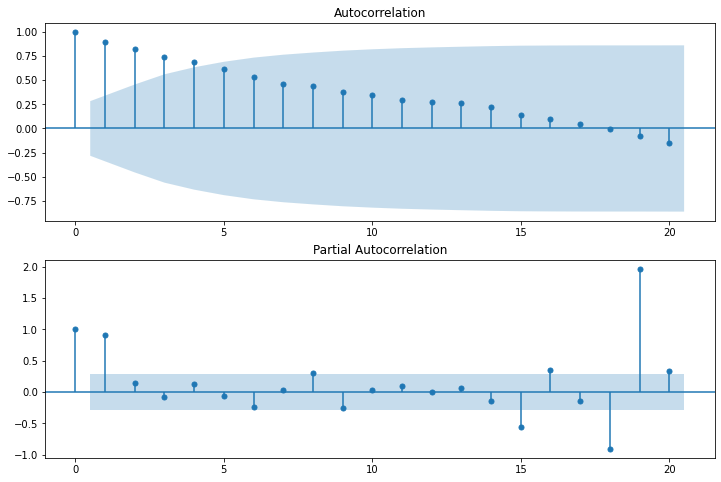

In [95]:
# Fuel
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(xtrain_fuel, lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(xtrain_fuel, lags=20, ax=ax2)

Les autocorrélations sont significatives pour un grand nombre de lags. Mais peut-être que les autocorrélations au-delà du lag 1 sont simplement dues à la propagation de l'autocorrélation au lag 1.

C'est confirmé par le PACF: on pourrait choisir un ARMA(1,0)

L'ACF ne décroit pas exponentiellement ce qui montre que la série peut être différenciable:

In [100]:
#Diff Fuel
xtrain_fuel = np.diff(xtrain_fuel)
xtest_fuel = np.diff(xtest_fuel)

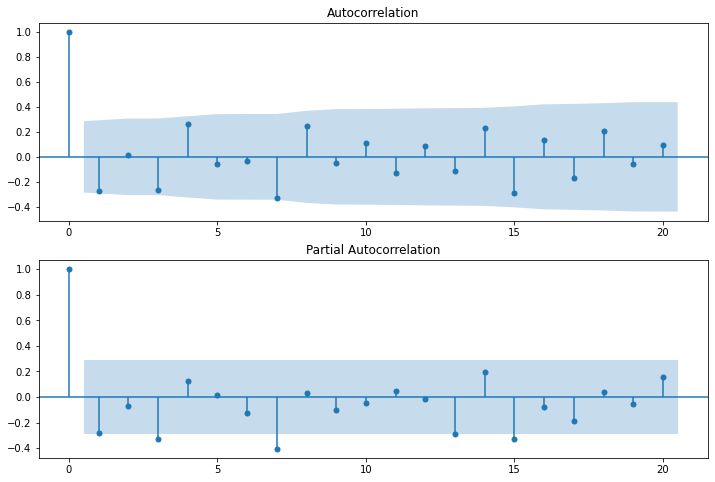

In [101]:
# Fuel
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(xtrain_fuel, lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(xtrain_fuel, lags=20, ax=ax2)

Concernant l'ACF, on peut choisir MA(0) et MA(1).
Ensuite, avec le PCAF, on peut voir pourra tester AR(1), et AR(7)

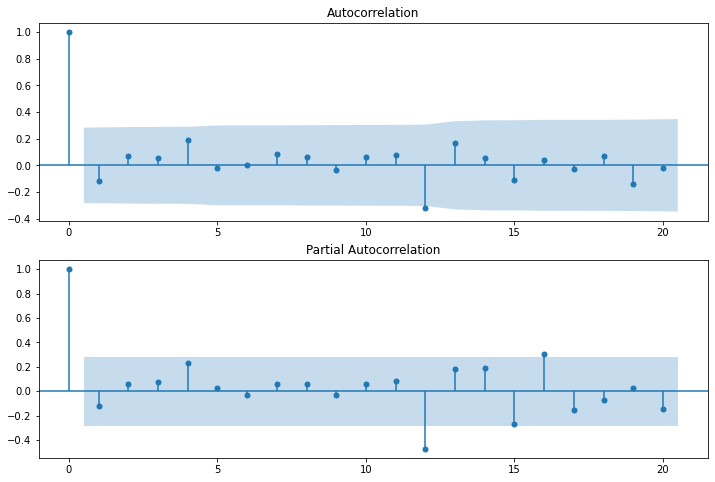

In [94]:
# Food
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(xtrain_food, lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(xtrain_food, lags=20, ax=ax2)

Concernant l'ACF, on peut choisir MA(0).
Ensuite, avec le PCAF, on peut voir pourra tester AR(1), AR(12) et AR(16).

## 3

In [104]:
def model_training(data, p, d, q):
    model = ARIMA(data, order=(p,d,q))
    model_fit = model.fit()    
    return model_fit

In [194]:
#Fuel 
p,d,q=7,1,0
model_fit_fuel1 = model_training(xtrain_fuel,p,d,q)

/Users/pierreloviton/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.81012D+00    |proj g|=  5.84573D-02

At iterate    5    f=  2.80409D+00    |proj g|=  2.47846D-03

At iterate   10    f=  2.80400D+00    |proj g|=  1.68443D-04

At iterate   15    f=  2.80399D+00    |proj g|=  1.15463D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     17     21      1     0     0   1.332D-07   2.804D+00
  F =   2.8039949853378094     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [122]:
#Fuel 
p,d,q=1,1,0
model_fit_fuel2 = model_training(xtrain_fuel,p,d,q)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.06992D+00    |proj g|=  6.29083D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      6      1     0     0   0.000D+00   3.070D+00
  F =   3.0697927049096534     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


In [123]:
#Fuel 
p,d,q=1,1,1
model_fit_fuel3 = model_training(xtrain_fuel,p,d,q)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.86711D+00    |proj g|=  9.80582D-01

At iterate    5    f=  2.83930D+00    |proj g|=  8.29345D-03

At iterate   10    f=  2.83929D+00    |proj g|=  4.92939D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     17      1     0     0   8.882D-08   2.839D+00
  F =   2.8392862190163601     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


In [132]:
print(model_fit_fuel1.summary(),'\n\n')
print(model_fit_fuel2.summary(),'\n\n')
print(model_fit_fuel3.summary(),'\n\n')

                             ARIMA Model Results                              
Dep. Variable:                 D.Food   No. Observations:                   47
Model:                ARIMA(12, 1, 0)   Log Likelihood                 -72.789
Method:                       css-mle   S.D. of innovations              1.092
Date:                Mon, 09 May 2022   AIC                            173.578
Time:                        16:55:01   BIC                            199.480
Sample:                    02-01-2016   HQIC                           183.325
                         - 12-01-2019                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0109      0.035      0.310      0.757      -0.058       0.080
ar.L1.D.Food     -0.9658      0.145     -6.661      0.000      -1.250      -0.682
ar.L2.D.Food     -0.8115      0.203     

FUEL:
        
    - Model1:
        - BIC: 199.480
        - AIC: 173.578
        - Erreur type: 0.035
        - Log-vraisemblance: -72.789
        
    - Model2:
        - BIC: 293.907
        - AIC: 288.421
        - Erreur type: 0.482
        - Log-vraisemblance: -141.210
        
    - Model3:
        - BIC: 276.529
        - AIC: 269.214
        - Erreur type: 0.034
        - Log-vraisemblance: -130.607

In [202]:
#Food 
p,d,q=1,0,0
model_fit_food1 = model_training(xtrain_food,p,d,q)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.60966D+00    |proj g|=  5.82597D-03

At iterate    5    f=  1.60963D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5     10      1     0     0   0.000D+00   1.610D+00
  F =   1.6096344888348557     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/pierreloviton/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/pierreloviton/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information w

In [125]:
#Food 
p,d,q=12,0,0
model_fit_food2 = model_training(xtrain_food,p,d,q)

/Users/pierreloviton/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.56003D+00    |proj g|=  9.81704D-02

At iterate    5    f=  1.48835D+00    |proj g|=  8.38425D-03

At iterate   10    f=  1.48776D+00    |proj g|=  7.26685D-04

At iterate   15    f=  1.48776D+00    |proj g|=  3.31291D-05

At iterate   20    f=  1.48776D+00    |proj g|=  9.54792D-07

At iterate   25    f=  1.48776D+00    |proj g|=  2.22045D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     25     28      1     0     0   

In [126]:
#Food 
p,d,q=16,0,0
model_fit_food3 = model_training(xtrain_food,p,d,q)

/Users/pierreloviton/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.56518D+00    |proj g|=  1.40853D-01

At iterate    5    f=  1.44280D+00    |proj g|=  3.98605D-02

At iterate   10    f=  1.43781D+00    |proj g|=  2.35829D-03

At iterate   15    f=  1.43779D+00    |proj g|=  2.56239D-04

At iterate   20    f=  1.43779D+00    |proj g|=  1.27898D-05

At iterate   25    f=  1.43779D+00    |proj g|=  3.33067D-07

At iterate   30    f=  1.43779D+00    |proj g|=  6.66134D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

In [196]:
print(model_fit_food1.summary(),'\n\n')
print(model_fit_food2.summary(),'\n\n')
print(model_fit_food3.summary(),'\n\n')

                              ARMA Model Results                              
Dep. Variable:                   Food   No. Observations:                   48
Model:                     ARMA(1, 0)   Log Likelihood                 -77.262
Method:                       css-mle   S.D. of innovations              1.210
Date:                Mon, 09 May 2022   AIC                            160.525
Time:                        18:13:57   BIC                            166.139
Sample:                    01-01-2016   HQIC                           162.646
                         - 12-01-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.8383      0.157    636.425      0.000      99.531     100.146
ar.L1.Food    -0.1157      0.142     -0.814      0.415      -0.394       0.163
                                    Roots           

FOOD:
        
    - Model1:
        - BIC: 166.139
        - AIC: 160.525
        - Erreur type: 0.157
        - Log-vraisemblance: -77.262
        
    - Model2:
        - BIC: 197.022
        - AIC: 170.825
        - Erreur type: 0.180
        - Log-vraisemblance: -71.412
        
    - Model3:
        - BIC: 207.710
        - AIC: 174.028
        - Erreur type: 0.233
        - Log-vraisemblance: -69.014

## 4

- Le critère d'information d'Akaike (AIC) estime la qualité de différents modèles statistiques. Avec cette valeur AIC, nous pouvons comparer le modèle et voir quel modèle correspond à l'ensemble de données meilleur. De plus, l'AIC prend également en compte le niveau de complexité de chaque modèle. Par exemple, un modèle qui a un bon ajustement et qui utilise moins de fonctionnalités obtiendra un meilleur score qu'un autre modèle qui aurait le même ajustement mais utiliserait plus de fonctionnalités.
- D'autre part, le critère d'information bayésien (BIC) est une sélection parmi un ensemble fini ensemble de modèles. Ce critère dépend fortement de la fonction de vraisemblance et de l'AIC. Le plus la valeur du BIC est faible et mieux c'est.
- Le log de vraisemblance est le logarithme des données provenant de la probabilité. Cette probabilité est rapportée par python et est particulièrement intéressante puisque nous veulent maximiser la valeur de log-vraisemblance. Par exemple, la technique du maximum estimation de vraisemblance, MLE consiste à travailler sur la valeur des différents paramètres pour atteindre la probabilité d'obtenir le maximum de données.
- L'erreur type est une valeur qui nous indique l'estimation de l'écart type de la distribution des coefficients. Ce coefficient varie selon les différents cas. Lorsqu'il est faible, cela signifie que la précision est élevée.

FUEL:
Sur la base des valeurs BIC et AIC de ces trois modèles ci-dessus, le meilleur modèle est le premier ARIMA(7,1,0). La valeur AIC et BIC étant la plus basse qui est représentant d'un bon modèle. Le log-vraisemblance est également le plus, et l'erreur type à 0.001 la plus basse.

FOOD:
Sur la base des valeurs BIC et AIC de ces trois modèles ci-dessus, le meilleur modèle est le premier ARIMA(1,0,0). La valeur AIC et BIC étant la plus basse qui est représentant d'un bon modèle. On peut également noté que l'erreur type à la plus basse.

## 5

Les résidus sont utiles pour appliquer des tests statistiques afin d'évaluer le modéle ARIMA.
 S'il n'y a pas de variables de régression, les erreurs seront identiques à la série originale (éventuellement ajustée pour avoir une moyenne nulle).

## 6

On va utiliser le test Box-Pierce sur les résidus : s'ils sont bons, ils ne devraient pas avoir d'auto-corrélation

On va utiliser le test Shapiro-Wilk sur les résidus pour confirmer qu'ils suivent une distribution gaussienne (ce qui appuiera le fait qu'ils sont du bruit blanc.

In [157]:
#FUEL - model 1

print("\n The Shapiro-Wilk test : \n", stats.shapiro(model_fit_fuel1.resid))
print("\n The Box-Pierce test : \n", acorr_ljungbox(model_fit_fuel1.resid, boxpierce=True, lags=[1]))


 The Shapiro-Wilk test : 
 ShapiroResult(statistic=0.9684892892837524, pvalue=0.2319069355726242)

 The Box-Pierce test : 
 (array([0.07405302]), array([0.78552448]), array([0.06951917]), array([0.79203817]))


/Users/pierreloviton/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


Le test de Shapiro-Wilk :
p=0.23>0.05 -> H0 vérifiée : Les données sont normalement distribuées


Le test Box-Pierce :
p-value=0.79>0.05 -> H0 vérifiée : il y a du bruit blanc.

En conclusion pour nos cas, il y a du bruit blanc ce qui confirme que la série est stationnaire.

In [160]:
#FUEL - model 2

print("\n The Shapiro-Wilk test : \n", stats.shapiro(model_fit_fuel2.resid))
print("\n The Box-Pierce test : \n", acorr_ljungbox(model_fit_fuel2.resid, boxpierce=True, lags=[1]))


 The Shapiro-Wilk test : 
 ShapiroResult(statistic=0.942074716091156, pvalue=0.02340761572122574)

 The Box-Pierce test : 
 (array([1.23873918]), array([0.26571418]), array([1.16131798]), array([0.28119237]))


Le test de Shapiro-Wilk :
p=0.023<0.05 -> H0 rejetée : Les données ne sont pas normalement distribuées


Le test Box-Pierce :
p-value=0.28>0.05 -> H0 vérifiée : il y a du bruit blanc.

En conclusion pour nos cas, la série est probablement pas stationnaire.

In [161]:
#FUEL - model 3

print("\n The Shapiro-Wilk test : \n", stats.shapiro(model_fit_fuel3.resid))
print("\n The Box-Pierce test : \n", acorr_ljungbox(model_fit_fuel3.resid, boxpierce=True, lags=[1]))


 The Shapiro-Wilk test : 
 ShapiroResult(statistic=0.9236258268356323, pvalue=0.005016119685024023)

 The Box-Pierce test : 
 (array([0.14628392]), array([0.70211218]), array([0.13714117]), array([0.71113978]))


Le test de Shapiro-Wilk :
p=0.005<0.05 -> H0 rejetée : Les données ne sont pas normalement distribuées


Le test Box-Pierce :
p-value=0.71>0.05 -> H0 vérifiée : il y a du bruit blanc.

En conclusion pour nos cas, la série est probablement pas stationnaire.

In [181]:
#FOOD - model 1

print("\n The Shapiro-Wilk test : \n", stats.shapiro(model_fit_food1.resid))
print("\n The Box-Pierce test : \n", acorr_ljungbox(model_fit_food1.resid, boxpierce=True, lags=[1]))


 The Shapiro-Wilk test : 
 ShapiroResult(statistic=0.9724463224411011, pvalue=0.3145141005516052)

 The Box-Pierce test : 
 (array([0.0009387]), array([0.97555806]), array([0.00088238]), array([0.97630244]))


/Users/pierreloviton/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


Le test de Shapiro-Wilk :
p=0.32>0.05 -> H0 vérifiée : Les données sont normalement distribuées


Le test Box-Pierce :
p-value=0.98>0.05 -> H0 vérifiée : il y a du bruit blanc.

En conclusion pour nos cas, il y a du bruit blanc ce qui confirme que la série est stationnaire.

In [164]:
#FOOD - model 2

print("\n The Shapiro-Wilk test : \n", stats.shapiro(model_fit_food2.resid))
print("\n The Box-Pierce test : \n", acorr_ljungbox(model_fit_food2.resid, boxpierce=True, lags=[1]))


 The Shapiro-Wilk test : 
 ShapiroResult(statistic=0.9707040786743164, pvalue=0.2697610557079315)

 The Box-Pierce test : 
 (array([0.05826216]), array([0.80926405]), array([0.05476643]), array([0.81496767]))


Le test de Shapiro-Wilk :
p=0.27>0.05 -> H0 vérifiée : Les données sont normalement distribuées


Le test Box-Pierce :
p-value=0.82>0.05 -> H0 vérifiée : il y a du bruit blanc.

En conclusion pour nos cas, il y a du bruit blanc ce qui confirme que la série est stationnaire.

In [182]:
#FOOD - model 3

print("\n The Shapiro-Wilk test : \n", stats.shapiro(model_fit_food3.resid))
print("\n The Box-Pierce test : \n", acorr_ljungbox(model_fit_food3.resid, boxpierce=True, lags=[1]))


 The Shapiro-Wilk test : 
 ShapiroResult(statistic=0.9808195233345032, pvalue=0.6131642460823059)

 The Box-Pierce test : 
 (array([0.07496861]), array([0.78423527]), array([0.0704705]), array([0.79065297]))


Le test de Shapiro-Wilk :
p=0.61>0.05 -> H0 vérifiée : Les données sont normalement distribuées


Le test Box-Pierce :
p-value=0.79>0.05 -> H0 vérifiée : il y a du bruit blanc.

En conclusion pour nos cas, il y a du bruit blanc ce qui confirme que la série est stationnaire.

Pour conclure, les deux tests on confirmé que les modèles 1 pour fuel et food étaient les plus adéquat à utiliser ici.

## 7

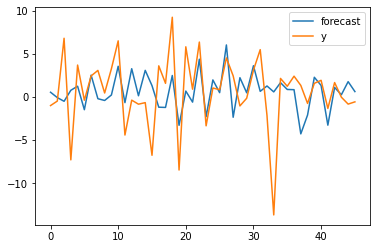

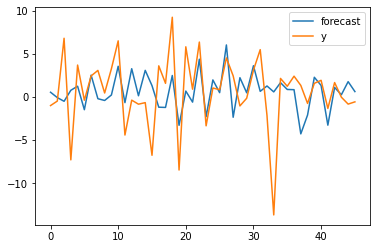

In [195]:
# FUEL

model_fit_fuel1.plot_predict()

/Users/pierreloviton/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


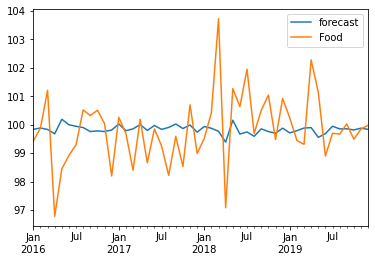

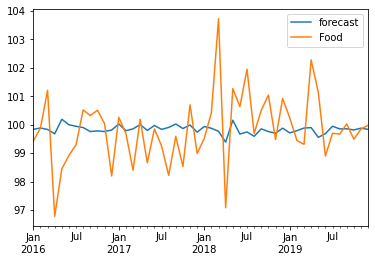

In [203]:
# FOOD

model_fit_food1.plot_predict()

## 8

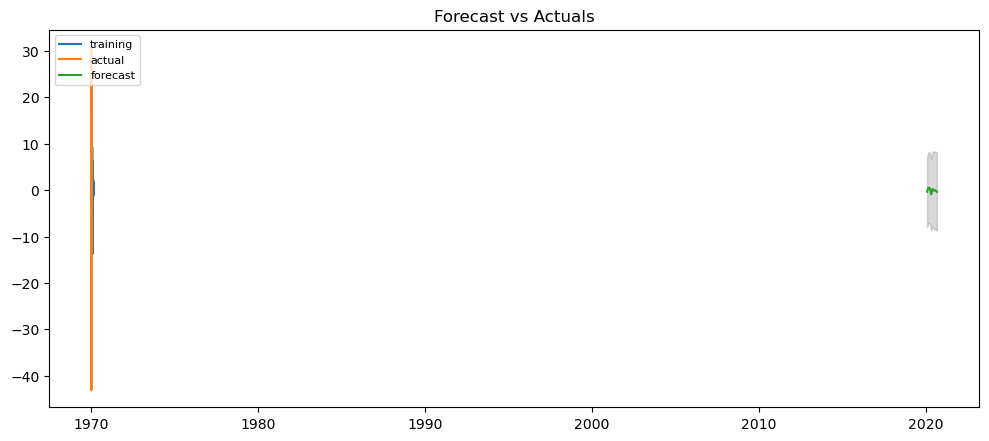

In [200]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  

# Forecast
fc, se, conf = model_fit_fuel1.forecast(8, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=df.index[49:])
lower_series = pd.Series(conf[:, 0], index=df.index[49:])
upper_series = pd.Series(conf[:, 1], index=df.index[49:])

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(xtrain_fuel, label='training')
plt.plot(xtest_fuel, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()